# Model Trainig File

# Importing Modules

In [2]:
import pandas as pd

# Data Collection and Preparation

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df.rename(columns={'v1': 'label', 'v2': 'message'})[['label', 'message']]
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Data Augmentation: Implement Evasive Techniques

In [4]:
import random

def add_evasive_techniques(text):
    evasive_text = text.replace('o', '0').replace('e', '3')
    evasive_text = " ".join([ch + random.choice(['', '*', '~']) for ch in evasive_text])
    return evasive_text

df['evasive_message'] = df['message'].apply(lambda x: add_evasive_techniques(x) if random.random() > 0.5 else x)


# Text Preprocessing
## Tokenization, Lowercasing, and Cleaning

In [5]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['cleaned_message'] = df['evasive_message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\verti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Feature Extraction with TF-IDF

In [6]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label'].values

# Dividing Dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Selection and Training

# Train Multiple Models

#### Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes:\n", classification_report(y_test, nb_pred))                          

Naive Bayes:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1453
           1       1.00      0.37      0.54       219

    accuracy                           0.92      1672
   macro avg       0.96      0.68      0.74      1672
weighted avg       0.92      0.92      0.90      1672



####  SVC

In [9]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM:\n", classification_report(y_test, svm_pred))

SVM:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1453
           1       0.97      0.42      0.59       219

    accuracy                           0.92      1672
   macro avg       0.94      0.71      0.77      1672
weighted avg       0.93      0.92      0.91      1672



#### Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest:\n", classification_report(y_test, rf_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1453
           1       0.98      0.41      0.57       219

    accuracy                           0.92      1672
   macro avg       0.95      0.70      0.77      1672
weighted avg       0.93      0.92      0.91      1672



# Moddel Evaluation

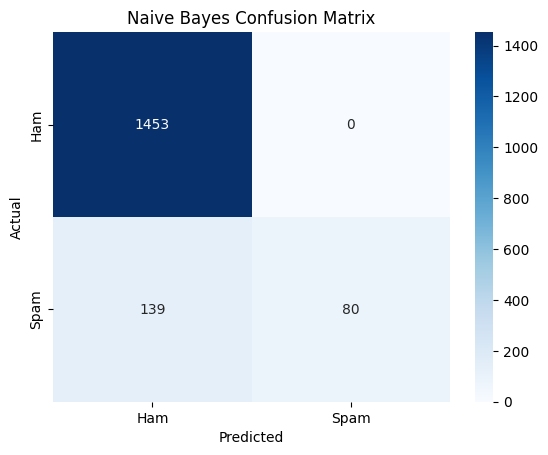

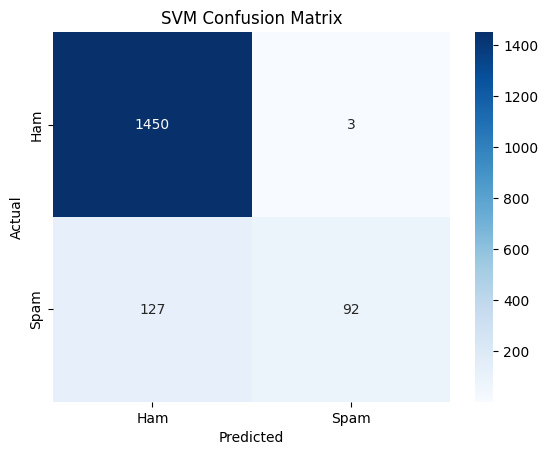

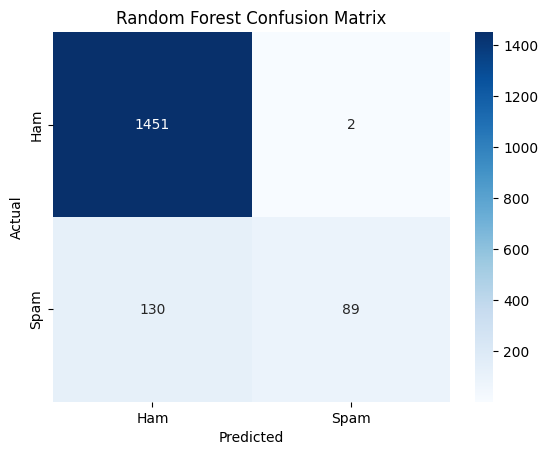

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, nb_pred, "Naive Bayes")
plot_confusion_matrix(y_test, svm_pred, "SVM")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")
